# IS 4487 Assignment 9: Customer Segmentation with Clustering

In this assignment, you will:
- Apply unsupervised learning to explore patterns in hotel booking behavior
- Use K-Means and Gaussian Mixture Models (GMM) for customer segmentation
- Evaluate model quality with metrics like Silhouette Score and Davies-Bouldin Index
- Connect clustering to actionable business insights

## Why This Matters

Businesses like hotels and travel platforms (e.g., Airbnb or Expedia) rely on customer segmentation to tailor promotions, pricing strategies, and service levels. Unlike supervised models, clustering helps uncover patterns when no labels exist—an ideal tool when entering new markets or analyzing unstructured customer behavior.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_09_clustering.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


## Dataset Description: Hotel Bookings

This dataset contains booking information for two types of hotels: a **city hotel** and a **resort hotel**. Each record corresponds to a single booking and includes various details about the reservation, customer demographics, booking source, and whether the booking was canceled.

**Source**: [GitHub - TidyTuesday: Hotel Bookings](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-11/readme.md)

### Key Use Cases
- Understand customer booking behavior
- Explore factors related to cancellations
- Segment guests based on booking characteristics
- Compare city vs. resort hotel performance

### Data Dictionary

| Variable | Type | Description |
|----------|------|-------------|
| `hotel` | character | Hotel type: City or Resort |
| `is_canceled` | integer | 1 = Canceled, 0 = Not Canceled |
| `lead_time` | integer | Days between booking and arrival |
| `arrival_date_year` | integer | Year of arrival |
| `arrival_date_month` | character | Month of arrival |
| `stays_in_weekend_nights` | integer | Nights stayed on weekends |
| `stays_in_week_nights` | integer | Nights stayed on weekdays |
| `adults` | integer | Number of adults |
| `children` | integer | Number of children |
| `babies` | integer | Number of babies |
| `meal` | character | Type of meal booked |
| `country` | character | Country code of origin |
| `market_segment` | character | Booking source (e.g., Direct, Online TA) |
| `distribution_channel` | character | Booking channel used |
| `is_repeated_guest` | integer | 1 = Repeated guest, 0 = New guest |
| `previous_cancellations` | integer | Past booking cancellations |
| `previous_bookings_not_canceled` | integer | Past bookings not canceled |
| `reserved_room_type` | character | Initially reserved room type |
| `assigned_room_type` | character | Room type assigned at check-in |
| `booking_changes` | integer | Number of booking modifications |
| `deposit_type` | character | Deposit type (No Deposit, Non-Refund, etc.) |
| `agent` | character | Agent ID who made the booking |
| `company` | character | Company ID (if booking through company) |
| `days_in_waiting_list` | integer | Days on the waiting list |
| `customer_type` | character | Booking type: Contract, Transient, etc. |
| `adr` | float | Average Daily Rate (price per night) |
| `required_car_parking_spaces` | integer | Requested parking spots |
| `total_of_special_requests` | integer | Number of special requests made |
| `reservation_status` | character | Final status (Canceled, No-Show, Check-Out) |
| `reservation_status_date` | date | Date of the last status update |

This dataset is ideal for classification, segmentation, and trend analysis exercises.

## 1. Setup and Load Data

Business framing:  

Before we can cluster or segment anything, we need clean, accessible data in a usable format.

- Import the necessary Python libraries
- Load the hotel bookings dataset [(Download Here)](https://github.com/rfordatascience/tidytuesday/blob/main/data/2020/2020-02-11/readme.md#get-the-data-here)
- Display the first few rows

### In Your Response:
1. What stands out in the initial preview? Any columns or rows that seem unusual?


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In the arrival_date_month column, I think it is odd that these are not numerical values, but instead categorical text values. It seems like it would be easier for these to be numerical values. In some rows, it lists both number of weeknights and number of weekend nights stayed as 0, which logically cannot be correct. Other than these things, this dataset looks good, as far as I can see in this preview.

## 2. Select and Prepare Features

Business framing:  

A hotel might want to group guests based on how long they stay, how far in advance they book, or how likely they are to make special requests. You need to pick variables that represent meaningful guest behavior.

- Choose 3–5 numeric features related to customer behavior
- Drop missing values if needed
- Standardize using `StandardScaler`

### In Your Response:
1. What features did you select and why?
2. What kinds of patterns or segments do you expect to find?


0
0
0
0


I picked total_of_special_requests because this is a good signifier of how high-maintenance a customer is, and how much they expect, which is important customer behavior to track. I picked ADR because customers that pay higher/lower daily rates often behave differently, and I want to look into this. I picked previous_cancellations because this is very important guest behavior to track and analyze. Last, lead_time is important because it lets us know how far out a customer booked a stay at a hotel. All four of these numeric features represent guest behavior that is important for hotels to understand and analyze.


I expect to see distinct groups that will form, especially in the total_of_special_requests and lead_time categories. It has been my experience that people tend to book vacations far in advance, or the week of, without much middle ground. It has also been my experience that people who make special requests tend to make many of them, especially at more luxurious hotels. As for ADR, I expect to see a pretty even spread, perhaps with some concentration at the high and low end of the price spectrum. I also expect previous_cancellations to be pretty evenly distributed. I am excited to see how these variables will interact with each other, and what groups might form.

## 3. Apply K-Means Clustering

Business framing:  

Let’s say you’re working with the hotel’s marketing manager. She wants to group guests into a few clear types to target email campaigns. K-Means is a fast, simple way to try this.

- Fit a `KMeans` model with your selected features
- Choose a value of `k` (e.g. 3, 4, or 5)
- Predict clusters and assign to each guest
- Visualize using a scatterplot of 2 features

Much of this assignment has already been covered in the lab. Please be sure to complete the lab before the assignment.

### In Your Response:
1. What `k` value did you choose, and how did you decide?
2. What types of customers seem to show up in the clusters?



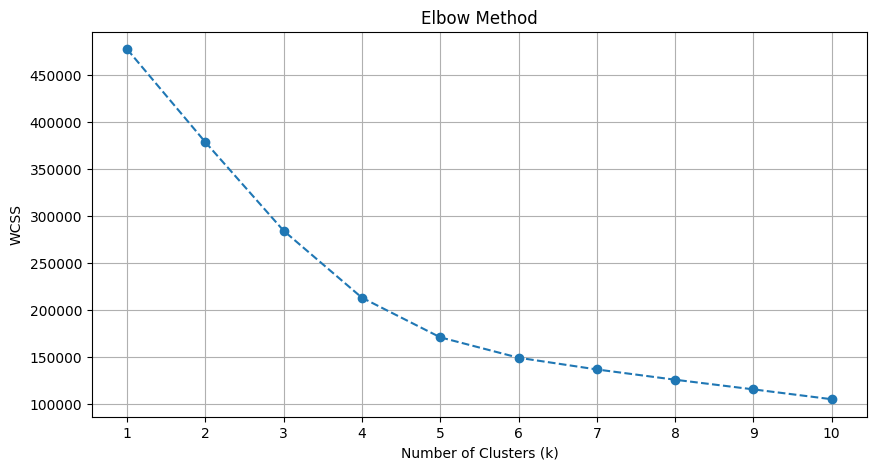

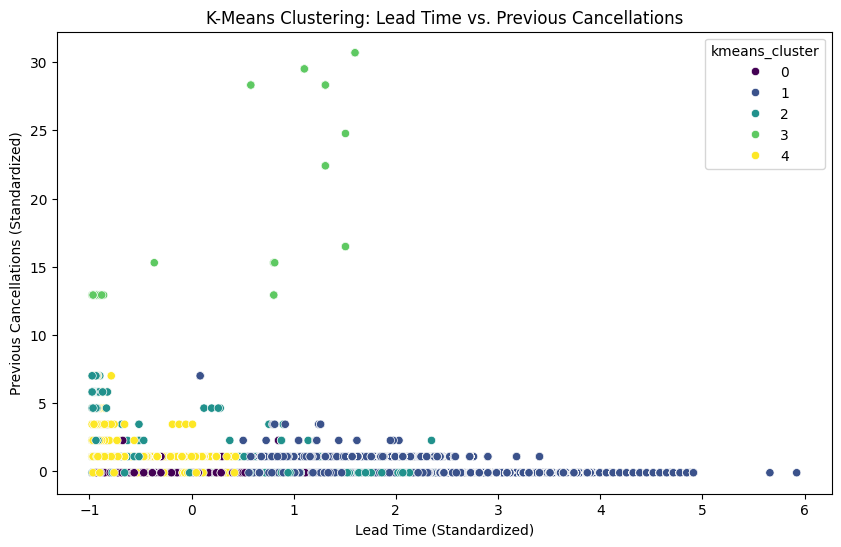

I picked a K value of 5. I calculated the WCSS for each K value between 1 and 10, and plotted this score. I picked the score at the "elbow point" of the graph, or where the values started decreasing much less rapidly. The elbow point works because the reduction in WCSS is no longer significant after this point. I am confident this was the optimal K value.


In one cluster, there are customers who have cancelled many, many times with a moderate lead time. In another, there are customers who have canceled just a few times with slightly shorter lead time. In another cluster, there are customers who have canceled maybe once, or no times, with a more lengthy lead time. This is a super interesting visualization.


## 4. Apply Gaussian Mixture Model (GMM)

Business framing:  

Not all guests fit neatly into one cluster. GMM lets us capture uncertainty — useful if customers behave similarly across groups.

- Fit a GMM with the same number of clusters you chose in Part 3
- Predict soft clusters (remember that soft clustering deals with probabilities, not labels)
- Visualize the GMM model so that you may compare it to the KMeans scatterplot

### In Your Response:
1. How did the GMM results compare to KMeans?
2. What business questions might GMM help answer better?


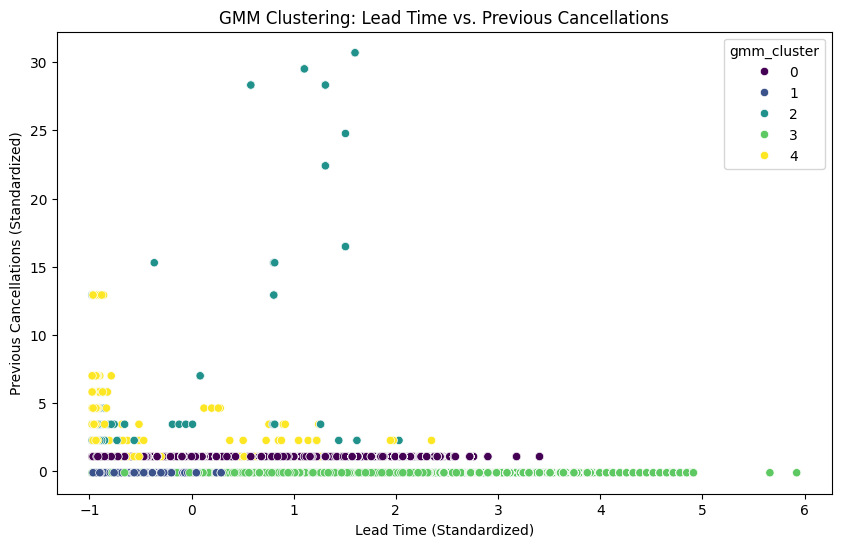

The GMM results were similar to KMeans. The GMM clusters seemed to be more uniform than the KMeans clusters, probably because they are based more on probability, and KMeans is based more on hard assignments.

GMM would be useful in answering business questions having to do with customer habits/personality traits, as it is based on probability. This allows for the flexibility that measuring these things demands. KMeans does not allow for this flexibility. GMM would also be useful for modeling multiple different things at once, such as overlapping customer types. This could help answer customer behavior business questions.


## 5. Evaluate Your Models

Business framing:  

In business, models should be both useful and reliable. You’ll compare model quality using standard evaluation metrics.

- Calculate:
  - WCSS
  - Silhouette Score
  - Davies-Bouldin Index
- Compare both models

**Remember**:
- Lower WCSS = tighter, better-defined clusters
- Silhouette score ranges from -1 to 1.  Higher values = better clustering
- Lower Davies-Boulding Index = better clustering

### In Your Response:
1. Which model performed better on the metrics?
2. Would you recommend KMeans or GMM for a business analyst? Why?


KMeans WCSS: 170856.5885407338


KMeans Silhouette Score: 0.33696913194326766


KMeans Davies-Bouldin Index: 0.9124922254191823


GMM Silhouette Score: 0.2070810678880528


In [43]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin Index for GMM using the hard cluster assignments
davies_bouldin_gmm = davies_bouldin_score(X, df['gmm_cluster'])
print(f'GMM Davies-Bouldin Index: {davies_bouldin_gmm}')

GMM Davies-Bouldin Index: 1.4896685541853347


The KMeans model performed better on the metrics than the GMM. It had a higher silhouette score and a lower Davies-Bouldin Index. Both of these things indicate better clustering with the KMeans model.


I would recommend KMeans for a business analyst because it is simple, fast, and very easy to interpret. It assigns each data point to one cluster, which is great for simplicity and ease. GMM is more computationally intensive and harder to read. KMeans is nice because is assigns overlapping points to the nearest cluster, making it very simple.



## 6. Business Interpretation

Business framing:  

What do these clusters mean in the real world? Could they represent solo travelers, families, or bargain shoppers?

- Review characteristics of each cluster (e.g. average `lead_time`, `special_requests`)
- Think from a marketing or hotel operations perspective

### In Your Response:
1. What do the segments represent in terms of guest behavior?
2. How could the hotel tailor services or promotions to each group?


In the real world, these clusters could represent indecisive bargain shoppers, well-off travelers with almost no lead time, and families planning trips far in advance. One cluster represents many, many cancellations, which could signal price-sensntive customers who tend to be indecisive. Another cluster has very little lead time and low cancellations. These are likely people who travel on a whim. Another cluster has almost no cancellations and a long lead time, which are people that plan vacations far in advance.


These groups require different promotions/marketing strategies. For the people with many cancellations, emphasizing value, perhaps for a limited time, could be a very effective marketing strategy. They would be less compelled to cancel if they felt they got the best bargain. For the people with very little lead time, emphasizing exclusivity, luxury, and great experiences could be a great strategy. These customers are likely less concerned about price and planning, and would appreciate this strategy. For the people that plan their trip very far in advance, early-bird discounts and special perks for booking so many months ahead could be a great marketing strategy. All of these groups are looking for different things, so they need to be communicated with differently.

## 7. Final Reflection

Business framing:  

Many teams ask for "segmentation" without knowing how it works. You now have hands-on experience with two clustering techniques and how to present the results.

### In Your Response:
1. What was most challenging about unsupervised learning?
2. When would you use clustering instead of supervised models?
3. How would you explain the value of clustering to a non-technical manager?
4. How does this relate to your customized learning outcome you created in canvas?


The most challenging thing about unsupervised learning, to me, was choosing the K value, and tailoring the algorithm to fit the data I was working with. I worried about picking the right K value for the data. The results were also harder to interpret than other data interpretation methods. Both these things were challenging.


I would use clustering instead of supervised models when data relationships are hard to understand, or if the data is unlabeled. Clustering is helpful for discovering hidden, often unexpected relationships. Clustering can also be great for identifying anomalies that don't fit into any of the main clusters. Clustering is a way to gain insights from available data, even when it is not labeled.


I would describe clustering as a way to organize data into logical categories, much like groceries in the store. I would tell the manager that algorithms find data points that are similar to others, sort of like white bread and bagels, and put those together. In the end, you end up with "aisles," or natural groupings found in the data. This can often provide insights that you wouldn't otherwise think about. This is how I would describe clustering to a non-technical manager.


In my customized learning outcome I created in Canvas, I mentioned wanting to look at hotel booking data, analyze it, and come up with actionable insights. I did this in this lab. I am fascinated with the concept of clustering. I think it is super interesting, and I appreciate how this lab relates to my customized learning outcome I created in Canvas.



## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas


In [44]:
!jupyter nbconvert --to html "assignment_09_clustering.ipynb"

[NbConvertApp] Converting notebook assignment_09_clustering.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 526609 bytes to assignment_09_clustering.html
